# Visão Computacional - Lista de Exercícios 1
Alunos:
- Luana Júlia Nunes Ferreira
- Lucas Mendes Massa

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Questão 1
A abordagem usada consiste em calcular a diferença absoluta entre as duas imagens transferidas para escala de cinza e encontrar uma máscara binária a partir dessa diferença para extrair o foreground 

In [2]:
img1 = cv2.imread('./first_frame.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

In [3]:
img2 = cv2.imread('./second_frame.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [4]:
img1.shape

(312, 500, 3)

In [5]:
img2_reshaped = cv2.resize(img2,(500,312))

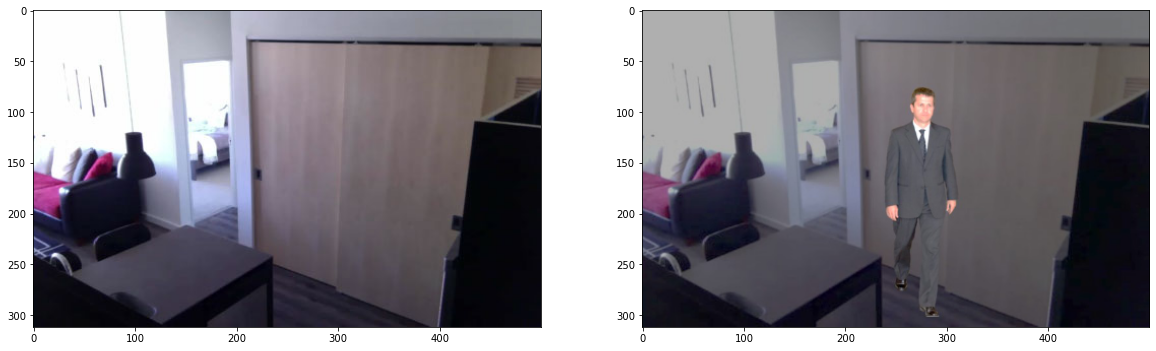

In [6]:
f, axarr = plt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(img1,cmap='gray')
axarr[1].imshow(img2_reshaped,cmap='gray')

In [7]:

# gerando imagens em escala de cinza
img1_gray = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2_reshaped,cv2.COLOR_RGB2GRAY)

# adicionando blur
# kernel1 = np.ones((11,11),np.float32)/50
# img1_gray = cv2.filter2D(img1_gray,-1,kernel1)

m1 = img1_gray.max()
m2 = img2_gray.max()

img1_gray = img1_gray/m1
img2_gray = img2_gray/m2

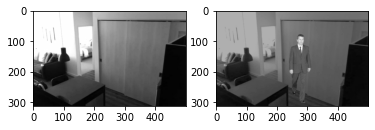

In [8]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img1_gray,cmap='gray')
axarr[1].imshow(img2_gray,cmap='gray')

In [9]:
diff_img = cv2.absdiff(img1_gray,img2_gray)

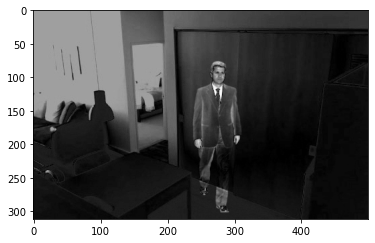

In [10]:
plt.imshow(diff_img, cmap='gray')

In [11]:
# obtendo uma mascara binaria para o foreground
threshold = 0.1
mask = np.zeros(312*500).reshape((312,500))

for i in range(diff_img.shape[0]):
    for j in range(diff_img.shape[1]):
        if diff_img[i,j]>=threshold:
            mask[i,j] = 1

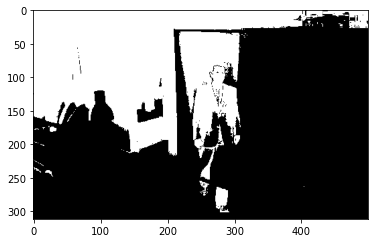

In [12]:
plt.imshow(mask,cmap='gray')

In [13]:
fore = np.zeros(3*312*500).reshape((312,500,3)).astype(int)

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] == 1:
            fore[i,j,:] = img2_reshaped[i,j,:]
            
kernel2 = np.ones((11,11),np.float32)/100
blured2 = cv2.filter2D(img2_reshaped,-1,kernel2)
            
res = np.zeros(3*312*500).reshape((312,500,3)).astype(int)

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] == 1:
            res[i,j,:] = fore[i,j,:]
        else:
            res[i,j,:] = blured2[i,j,:]

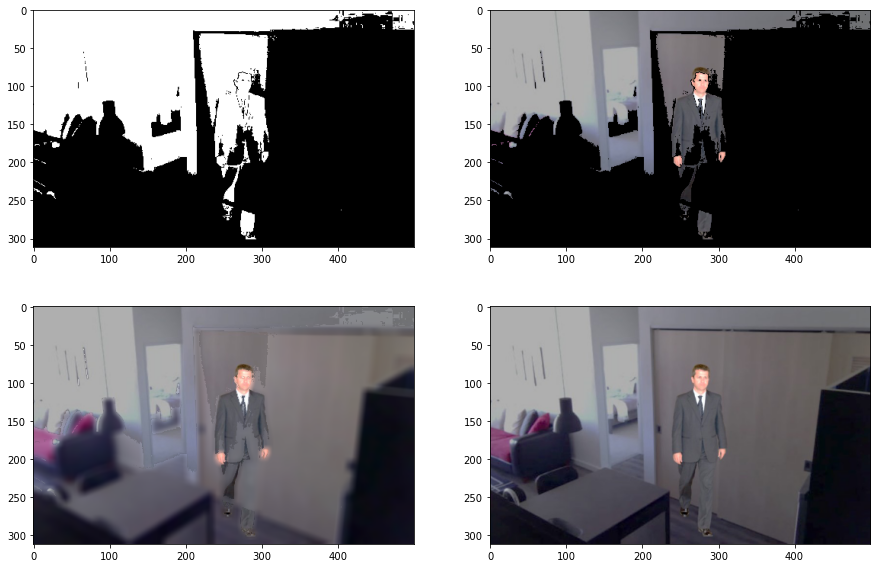

In [14]:
# plotando, respectivamente, a mascara binaria, o foreground obtido,
# a composição de foreground com a imagem 2 e a imagem 2 original. 
f, axarr = plt.subplots(2,2,figsize=(15,10))
axarr[0,0].imshow(mask,cmap='gray')
axarr[0,1].imshow(fore,cmap='gray')
axarr[1,0].imshow(res,cmap='gray')
axarr[1,1].imshow(img2_reshaped,cmap='gray')

# Questão 2

In [15]:
m = fore.max()
alpha = 0.7
s = cv2.GaussianBlur(fore/m,(13,13),10)
d = fore - s
newfore = fore + alpha*d
m = newfore.max()
newfore = newfore/m

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


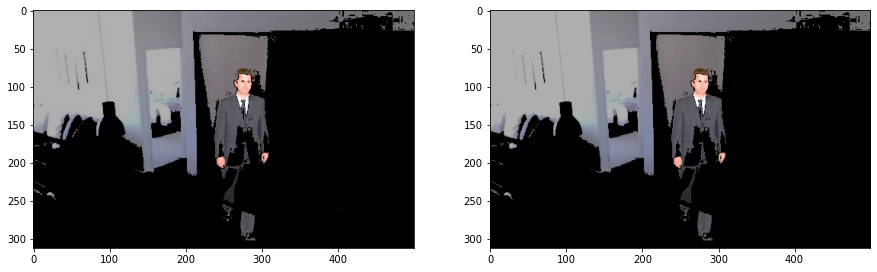

In [16]:
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(fore,cmap='gray')
axarr[1].imshow(newfore,cmap='gray')

# Questão 3

In [17]:
def conv2D(image,kernel,r,c,h,w,k):
    channel0 = []
    linear_kernel = np.flip(kernel)
    linear_kernel = linear_kernel.reshape(r*r)
    
    for x in range(k,image.shape[0]-k):
        new_row = []       
        for y in range(k,image.shape[1]-k):
            submatrix = image[x-k:x+k+1,y-k:y+k+1]
            submatrix = submatrix.reshape(r*r)
            pixel = np.dot(submatrix,linear_kernel)
            new_row.append(pixel)
        channel0.append(new_row)
        
    channel0 = np.array(channel0)
    result = np.zeros(channel0.shape[0]*channel0.shape[1]).reshape((channel0.shape[0],channel0.shape[1]))
    result[:,:] = channel0
    
    return result

In [18]:
# funcao para aplicar filtro em imagem escala de cinza

def aplicarFiltro(image,kernel):
    r = kernel.shape[0]
    c = kernel.shape[1]
    h = image.shape[0]
    w = image.shape[1]
    
    if r != c:        
        print('Erro: O kernel passado não é uma matriz quadrada')
        return None
    
    if (r%2==0):
        print('Erro: O kernel passado possui número par de linhas e colunas')
        
    k = int((r-1)/2)
    
    if len(image.shape) == 2:
        result = conv2D(image,kernel,r,c,h,w,k)
    else:
        return None
    
    # salva resultado no disco    
    plt.imsave('./convresult.png',result)
        
    return result

In [19]:
# filtro a ser aplicado
filtro = np.array([
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1]
]).astype(float)
filtro *= 1/20

In [20]:
small_img1 = cv2.resize(img1,(200,100))
small_img1_gray = cv2.cvtColor(small_img1,cv2.COLOR_RGB2GRAY)
filtered = aplicarFiltro(small_img1_gray,filtro)

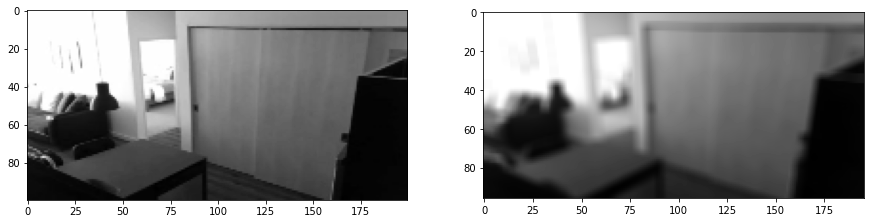

In [21]:
# imagem original e resultado da convolução, respectivamente
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(small_img1_gray,cmap='gray')
axarr[1].imshow(filtered/255,cmap='gray')

# Questão 4

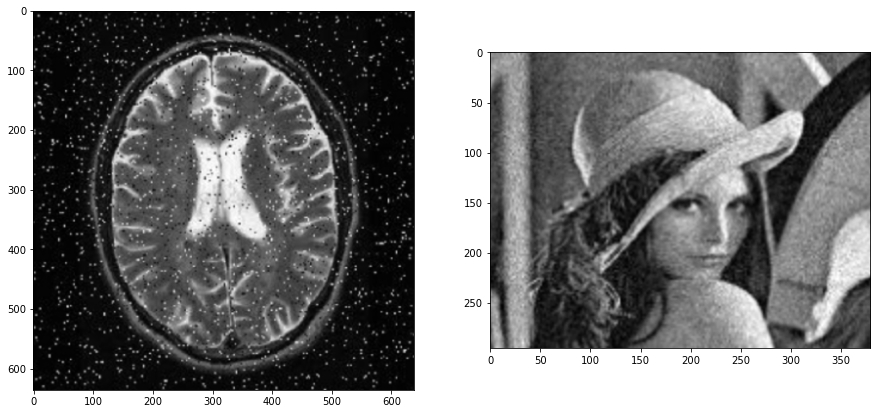

In [22]:
# carregando as imagens originais
noisy1 = cv2.imread('./noisy1.png')
noisy2 = cv2.imread('./noisy2.png')

noisy1 = cv2.cvtColor(noisy1,cv2.COLOR_BGR2GRAY)/255
noisy2 = cv2.cvtColor(noisy2,cv2.COLOR_BGR2GRAY)/255

percent = 200

noisy1 = cv2.resize(noisy1,(int(noisy1.shape[1] * percent / 100),int(noisy1.shape[0] * percent / 100)))
noisy2 = cv2.resize(noisy2,(int(noisy2.shape[1] * percent / 100),int(noisy2.shape[0] * percent / 100)))

f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(noisy1,cmap='gray')
axarr[1].imshow(noisy2,cmap='gray')

### Mean Filter
O mean filter funciona bem para a imagem da direita e mal para a imagem da esquerda.

In [23]:
def meanFilter2D(image,n):
    mean_kernel = np.ones(n*n).reshape((n,n))
    mean_kernel = (1/(n**2))*mean_kernel
    result = aplicarFiltro(image,mean_kernel) # usando função da questão 3
    return result

In [24]:
mean_noisy1 = meanFilter2D(noisy1,9)
mean_noisy2 = meanFilter2D(noisy2,7)

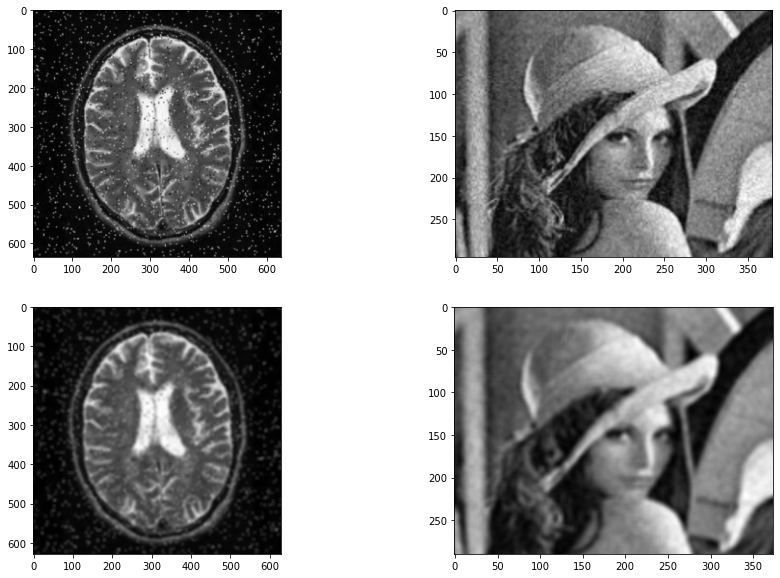

In [25]:
# plotando os resultados
# na coluna superior se encontram as imagens originais
# na coluna inferior se encontram as imagens filtradas

f, axarr = plt.subplots(2,2,figsize=(15,10))
axarr[0,0].imshow(noisy1,cmap='gray')
axarr[0,1].imshow(noisy2,cmap='gray')
axarr[1,0].imshow(mean_noisy1,cmap='gray')
axarr[1,1].imshow(mean_noisy2,cmap='gray')

### Median Filter
O median filter funciona bem para a imagem da esquerda e mal para a da direita.

In [26]:
def medianFilter2D(image,n):
    h = image.shape[0]
    w = image.shape[1]
    
    if (n%2==0):
        print('Erro: O kernel passado possui número par de linhas e colunas')
        
    k = int((n-1)/2)
    
    channel0 = []
    
    for x in range(k,image.shape[0]-k):
        new_row = []       
        for y in range(k,image.shape[1]-k):
            current_window = image[x-(k+1):x+(k-1),y-(k+1):y+(k-1)]
            pixel = np.median(current_window)
            new_row.append(pixel)
        channel0.append(new_row)
        
    channel0 = np.array(channel0)
    result = np.zeros(channel0.shape[0]*channel0.shape[1]).reshape((channel0.shape[0],channel0.shape[1]))
    result[:,:] = channel0
    
    return result

In [27]:
median_noisy1 = medianFilter2D(noisy1,11)
median_noisy2 = medianFilter2D(noisy2,5)

C:\Users\Lucas Massa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Lucas Massa\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


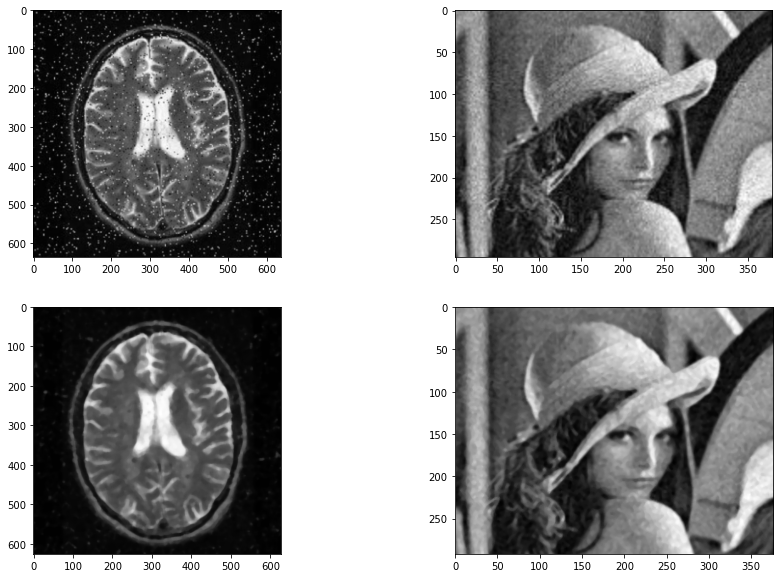

In [28]:
# plotando os resultados
# na coluna superior se encontram as imagens originais
# na coluna inferior se encontram as imagens filtradas

f, axarr = plt.subplots(2,2,figsize=(15,10))
axarr[0,0].imshow(noisy1,cmap='gray')
axarr[0,1].imshow(noisy2,cmap='gray')
axarr[1,0].imshow(median_noisy1,cmap='gray')
axarr[1,1].imshow(median_noisy2,cmap='gray')

# Questão 5
Aplicando extração de detalhes.
Ao se aumentar o tamanho do kernel é possível ver que as features extraídas perdem sua resolução, se tornando mais espessas.

In [29]:
cat = cv2.imread('./cat.jpg')
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2GRAY)/255

car = cv2.imread('./car.png')
car = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)/255

dog = cv2.imread('./dog.png')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2GRAY)/255

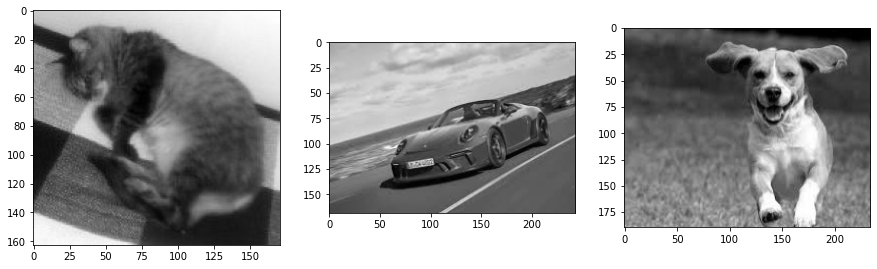

In [30]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(cat,cmap='gray')
axarr[1].imshow(car,cmap='gray')
axarr[2].imshow(dog,cmap='gray')

Fazendo uso da função implementada na questão 4

In [31]:
def detailExtraction(image,n):
    image = image/255
    
    smooth = meanFilter2D(image,n) # função implementada na questão 4
    image = cv2.resize(image,(smooth.shape[1],smooth.shape[0]))
    result = image - smooth
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            if np.isnan(result[i,j]):
                result[i,j] = 0.0
    return result

### Aplicando n = 3

In [32]:
n3_sharp_cat = detailExtraction(cat,3)
n3_sharp_car = detailExtraction(car,3)
n3_sharp_dog = detailExtraction(dog,3)

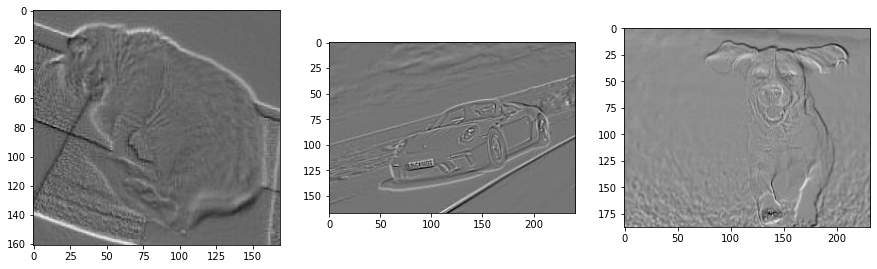

In [33]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(n3_sharp_cat,cmap='gray')
axarr[1].imshow(n3_sharp_car,cmap='gray')
axarr[2].imshow(n3_sharp_dog,cmap='gray')

### Aplicando n = 7

In [34]:
n7_sharp_cat = detailExtraction(cat,7)
n7_sharp_car = detailExtraction(car,7)
n7_sharp_dog = detailExtraction(dog,7)

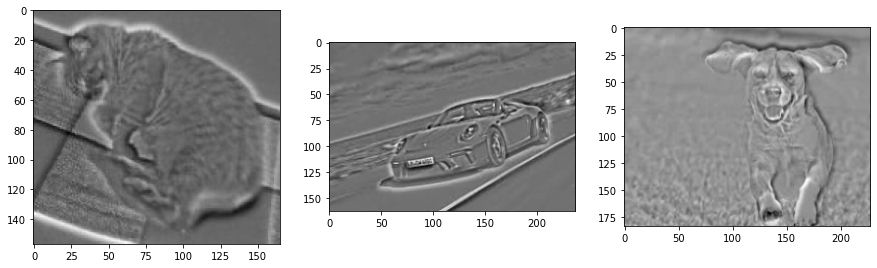

In [35]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(n7_sharp_cat,cmap='gray')
axarr[1].imshow(n7_sharp_car,cmap='gray')
axarr[2].imshow(n7_sharp_dog,cmap='gray')

### Aplicando n = 11

In [36]:
n11_sharp_cat = detailExtraction(cat,11)
n11_sharp_car = detailExtraction(car,11)
n11_sharp_dog = detailExtraction(dog,11)

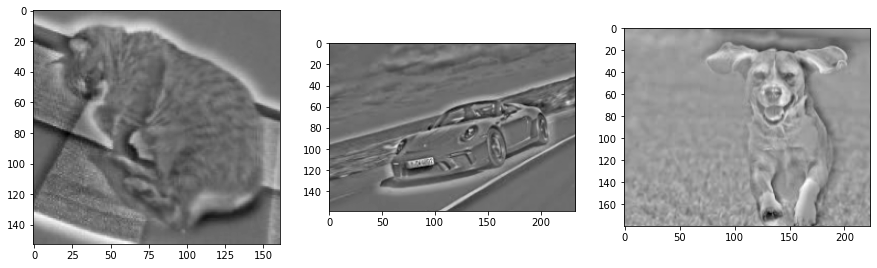

In [37]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(n11_sharp_cat,cmap='gray')
axarr[1].imshow(n11_sharp_car,cmap='gray')
axarr[2].imshow(n11_sharp_dog,cmap='gray')

# Questão 6
Aplicando mean filter implementado na questão 4. Ao se aumentar o tamanho do kernel é possível ver que as imagens se tornam cada vez mais borradas.

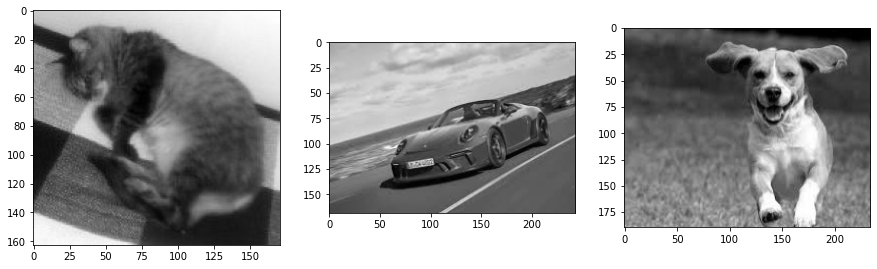

In [38]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(cat,cmap='gray')
axarr[1].imshow(car,cmap='gray')
axarr[2].imshow(dog,cmap='gray')

### Aplicando para n = 3

In [39]:
n3_cat = meanFilter2D(cat,3)
n3_car = meanFilter2D(car,3)
n3_dog = meanFilter2D(dog,3)

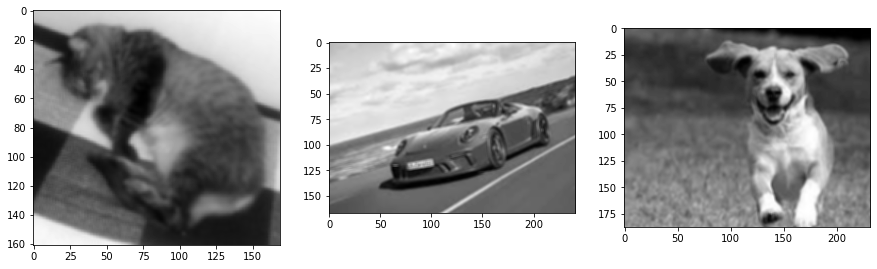

In [40]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(n3_cat,cmap='gray')
axarr[1].imshow(n3_car,cmap='gray')
axarr[2].imshow(n3_dog,cmap='gray')

### Aplicando para n = 7

In [41]:
n7_cat = meanFilter2D(cat,7)
n7_car = meanFilter2D(car,7)
n7_dog = meanFilter2D(dog,7)

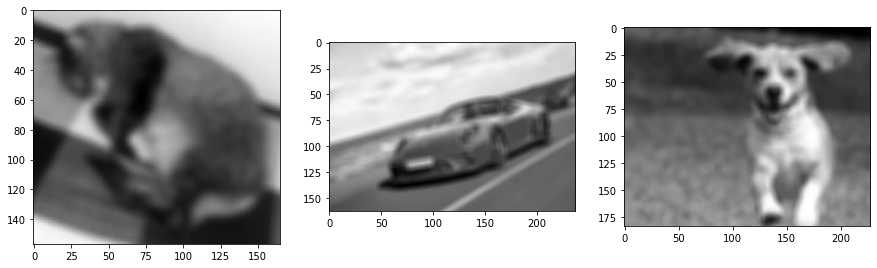

In [42]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(n7_cat,cmap='gray')
axarr[1].imshow(n7_car,cmap='gray')
axarr[2].imshow(n7_dog,cmap='gray')

### Aplicando n = 11

In [43]:
n11_cat = meanFilter2D(cat,11)
n11_car = meanFilter2D(car,11)
n11_dog = meanFilter2D(dog,11)

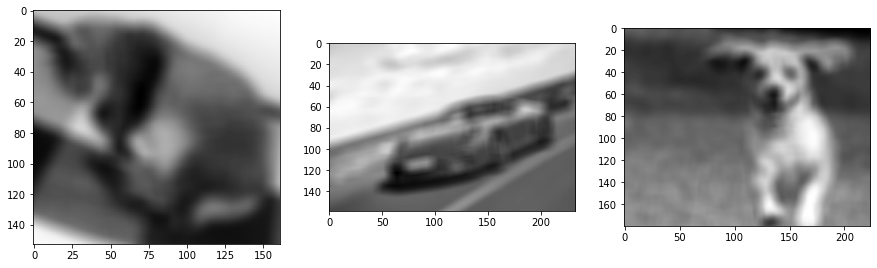

In [44]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(n11_cat,cmap='gray')
axarr[1].imshow(n11_car,cmap='gray')
axarr[2].imshow(n11_dog,cmap='gray')

# Questão 7
Aplicando extração de arestas. Ao se aumentar o tamanho do kernel é possível ver que o resultdo perde resolução e que as arestas extraídas se tornam mais espessas.

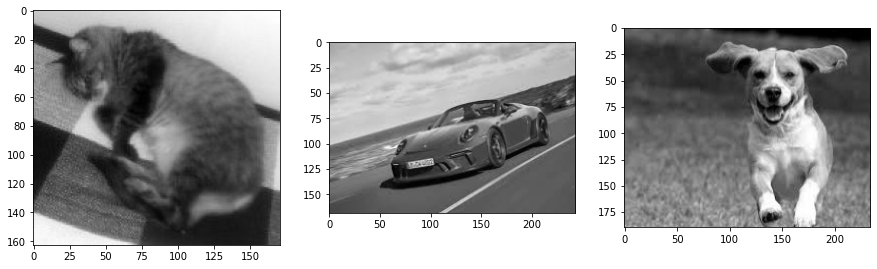

In [45]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(cat,cmap='gray')
axarr[1].imshow(car,cmap='gray')
axarr[2].imshow(dog,cmap='gray')

### Aplicando para n = 3

In [46]:
derivative_n3 = np.array([
        [-1,0,1],
        [-1,0,1],
        [-1,0,1]
])

In [47]:
edge_n3_cat = aplicarFiltro(cat,derivative_n3)
edge_n3_car = aplicarFiltro(car,derivative_n3)
edge_n3_dog = aplicarFiltro(dog,derivative_n3)

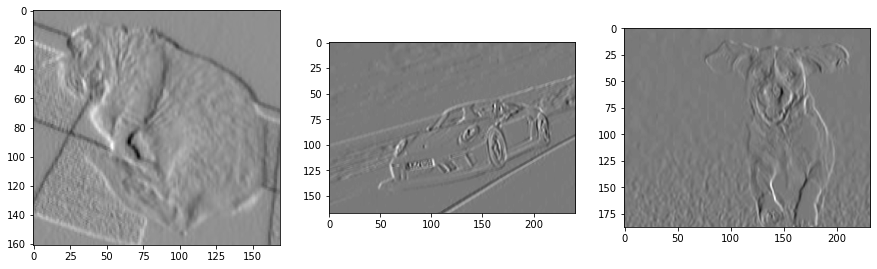

In [48]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(edge_n3_cat,cmap='gray')
axarr[1].imshow(edge_n3_car,cmap='gray')
axarr[2].imshow(edge_n3_dog,cmap='gray')

### Aplicando para n = 11

In [49]:
derivative_n7 = np.array([
        [-1,-1,-1,0,1,1,1],
        [-1,-1,-1,0,1,1,1],
        [-1,-1,-1,0,1,1,1],
        [-1,-1,-1,0,1,1,1],
        [-1,-1,-1,0,1,1,1],
        [-1,-1,-1,0,1,1,1],
        [-1,-1,-1,0,1,1,1],
])

In [50]:
edge_n7_cat = aplicarFiltro(cat,derivative_n7)
edge_n7_car = aplicarFiltro(car,derivative_n7)
edge_n7_dog = aplicarFiltro(dog,derivative_n7)

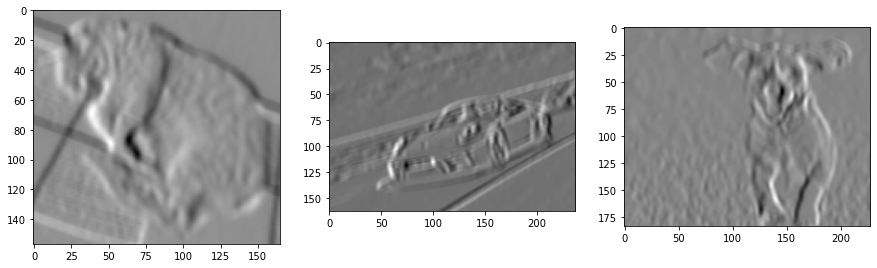

In [51]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(edge_n7_cat,cmap='gray')
axarr[1].imshow(edge_n7_car,cmap='gray')
axarr[2].imshow(edge_n7_dog,cmap='gray')

### Aplicando para n = 11

In [52]:
derivative_n11 = np.array([
        [-1,-1,-1,-1,-1,0,1,1,1,1,1],
        [-1,-1,-1,-1,-1,0,1,1,1,1,1],
        [-1,-1,-1,-1,-1,0,1,1,1,1,1],
        [-1,-1,-1,-1,-1,0,1,1,1,1,1],
        [-1,-1,-1,-1,-1,0,1,1,1,1,1],
        [-1,-1,-1,-1,-1,0,1,1,1,1,1],
        [-1,-1,-1,-1,-1,0,1,1,1,1,1],
        [-1,-1,-1,-1,-1,0,1,1,1,1,1],
        [-1,-1,-1,-1,-1,0,1,1,1,1,1],
        [-1,-1,-1,-1,-1,0,1,1,1,1,1],
        [-1,-1,-1,-1,-1,0,1,1,1,1,1],
])

In [53]:
edge_n11_cat = aplicarFiltro(cat,derivative_n11)
edge_n11_car = aplicarFiltro(car,derivative_n11)
edge_n11_dog = aplicarFiltro(dog,derivative_n11)

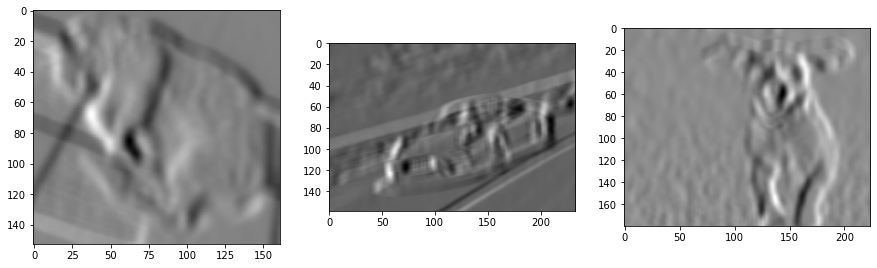

In [54]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(edge_n11_cat,cmap='gray')
axarr[1].imshow(edge_n11_car,cmap='gray')
axarr[2].imshow(edge_n11_dog,cmap='gray')

# Questão 8

In [55]:
def hybridImage(high_image,low_image,nh,nl):
    smooth_high = cv2.GaussianBlur(high_image,(nh,nh),5)
    detail = high_image - smooth_high
    
    low_image = cv2.GaussianBlur(low_image,(nl,nl),5)
    
    result = low_image + detail
        
    return result

### Primeiro conjunto de imagens

In [56]:
dog1 = cv2.imread('./dog1.png')
cat1 = cv2.imread('./cat1.png')

dog1 = cv2.resize(dog1,(200,200))
cat1 = cv2.resize(cat1,(200,200))

dog1 = cv2.cvtColor(dog1,cv2.COLOR_BGR2RGB)
cat1 = cv2.cvtColor(cat1,cv2.COLOR_BGR2RGB)

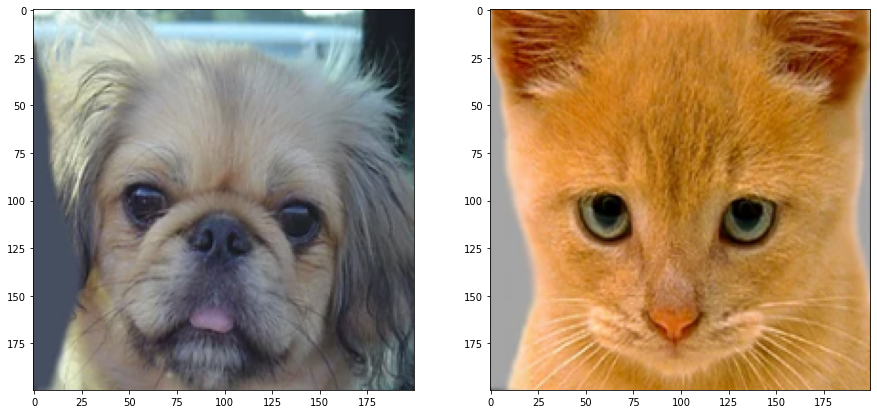

In [57]:
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(dog1,cmap='gray')
axarr[1].imshow(cat1,cmap='gray')

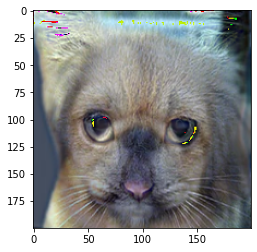

In [58]:
hybrid1 = hybridImage(cat1,dog1,9,5)
plt.imshow(hybrid1)

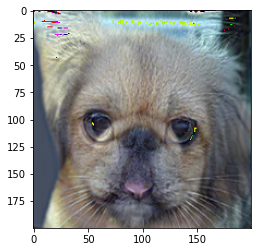

In [59]:
hybrid1 = hybridImage(cat1,dog1,7,3)
plt.imshow(hybrid1)

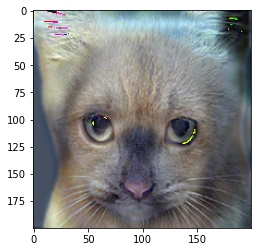

In [60]:
hybrid1 = hybridImage(cat1,dog1,11,11)
plt.imshow(hybrid1)

### Segundo conjunto de imagens

In [61]:
lambo = cv2.imread('./lambo.png')
ferrari = cv2.imread('./ferrari.png')

lambo = cv2.resize(lambo,(200,120))
ferrari = cv2.resize(ferrari,(200,120))

lambo = cv2.cvtColor(lambo,cv2.COLOR_BGR2RGB)
ferrari = cv2.cvtColor(ferrari,cv2.COLOR_BGR2RGB)

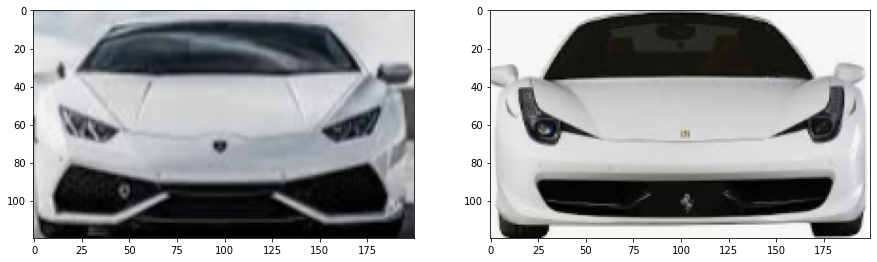

In [62]:
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(lambo)
axarr[1].imshow(ferrari)

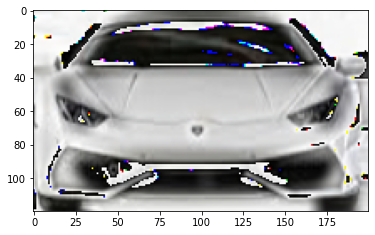

In [63]:
hybrid2 = hybridImage(lambo,ferrari,11,11)
plt.imshow(hybrid2)

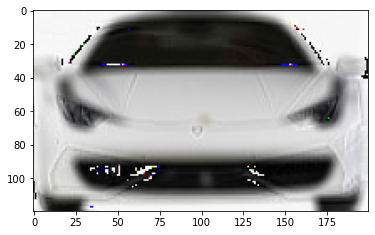

In [64]:
hybrid2 = hybridImage(lambo,ferrari,3,7)
plt.imshow(hybrid2)

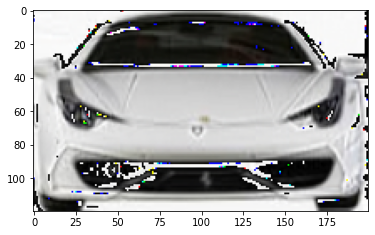

In [65]:
hybrid2 = hybridImage(lambo,ferrari,5,3)
plt.imshow(hybrid2)

### Terceiro conjunto de imagens

In [66]:
c_america = cv2.imread('./america.png')
superman = cv2.imread('./super.png')

c_america = cv2.resize(c_america,(100,120))
superman = cv2.resize(superman,(100,120))

c_america = cv2.cvtColor(c_america,cv2.COLOR_BGR2RGB)
superman = cv2.cvtColor(superman,cv2.COLOR_BGR2RGB)

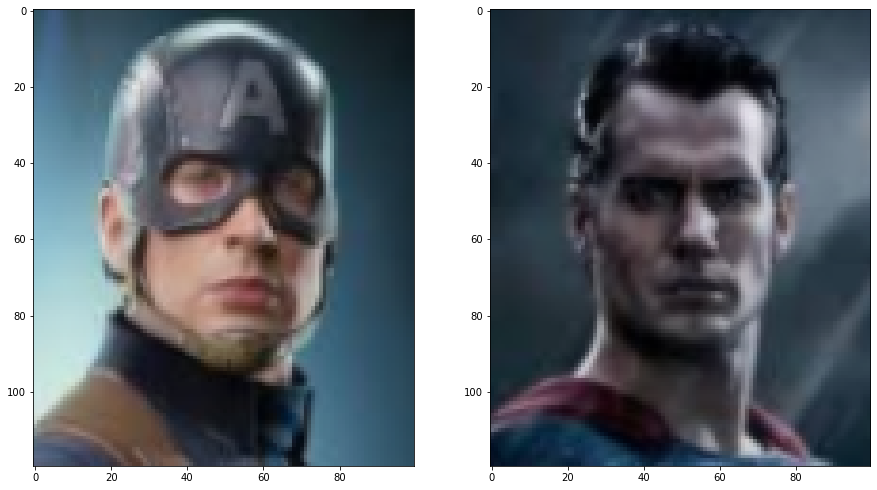

In [67]:
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(c_america)
axarr[1].imshow(superman)

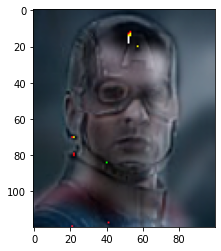

In [68]:
hybrid1 = hybridImage(c_america,superman,5,11)
plt.imshow(hybrid1)

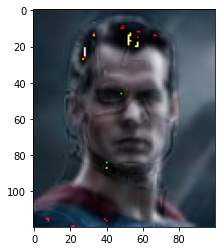

In [69]:
hybrid2 = hybridImage(c_america,superman,3,3)
plt.imshow(hybrid2)

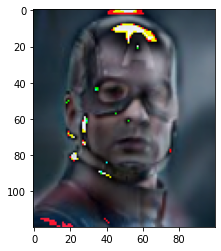

In [70]:
hybrid3 = hybridImage(c_america,superman,11,11)
plt.imshow(hybrid3)

# Questão 9

In [71]:
g = np.array([
    [1/273,4/273,7/273,4/273,1/273],
    [4/273,16/273,26/273,16/273,4/273],
    [7/273,26/273,41/273,26/273,7/273],
    [4/273,16/273,26/273,16/273,4/273],
    [1/273,4/273,7/273,4/273,1/273]
])

In [72]:
I = np.zeros(100*100).reshape((100,100))
I[49,49] = 255

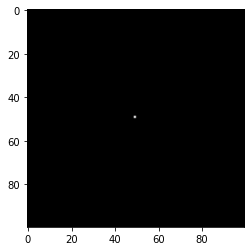

In [73]:
plt.imshow(I,cmap='gray')

### Aplicando convoluções

In [74]:
conv1 = cv2.filter2D(I,-1,g)
conv2 = cv2.filter2D(g,-1,I)

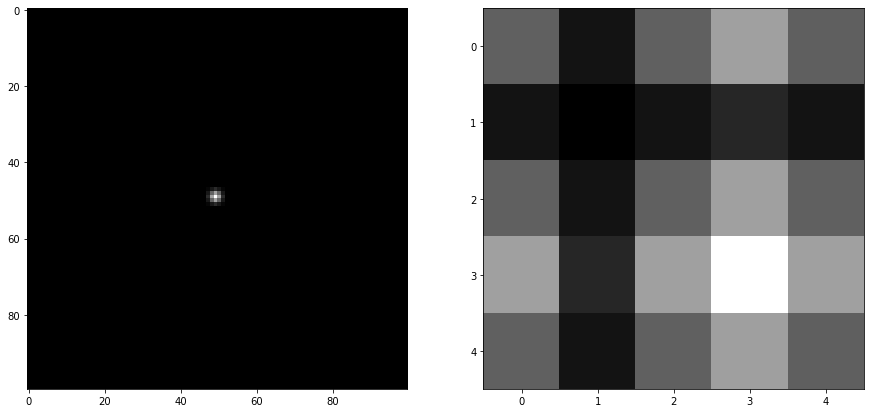

In [75]:
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(conv1,cmap='gray')
axarr[1].imshow(conv2,cmap='gray')

### Aplicando relação cruzada

In [76]:
cross1 = cv2.filter2D(I,-1,np.flip(g))
cross2 = cv2.filter2D(g,-1,np.flip(I))

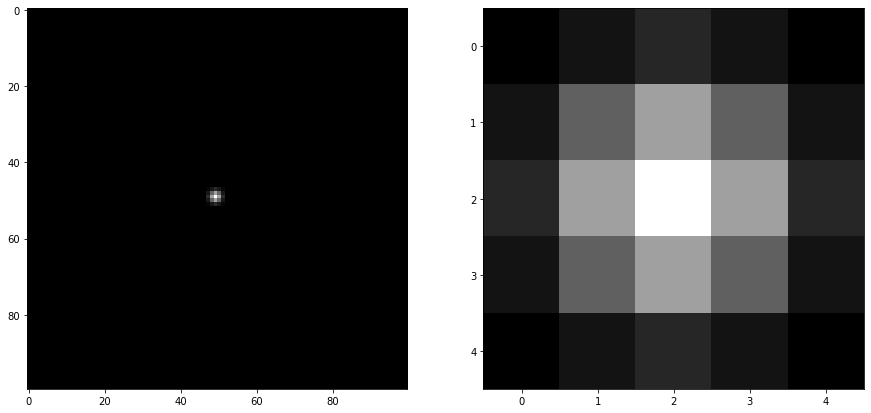

In [77]:
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(cross1,cmap='gray')
axarr[1].imshow(cross2,cmap='gray')

# Questão 10

Tamanho original cat:(163,171)
Tamanho original car:(169,243)
Tamanho original dog:(190,234)


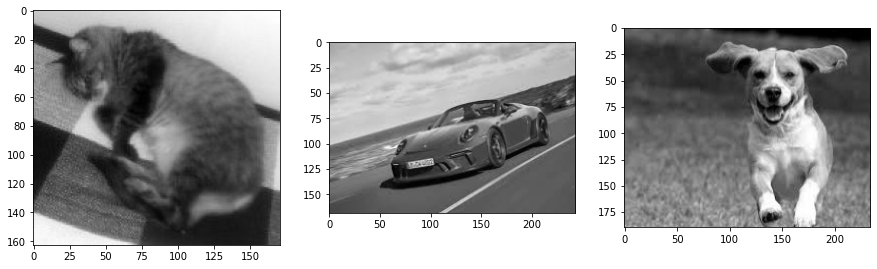

In [78]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(cat,cmap='gray')
axarr[1].imshow(car,cmap='gray')
axarr[2].imshow(dog,cmap='gray')

print('Tamanho original cat:({},{})'.format(cat.shape[0],cat.shape[1]))
print('Tamanho original car:({},{})'.format(car.shape[0],car.shape[1]))
print('Tamanho original dog:({},{})'.format(dog.shape[0],dog.shape[1]))

In [79]:
def reshapeImage(image,factor):
    h = image.shape[0]
    w = image.shape[1]
    
    h *= factor
    w *= factor
    
    result = cv2.resize(image,(int(w),int(h)))
    return result

Tamanho aumentado cat:(652,684)
Tamanho aumentado car:(676,972)
Tamanho aumentado dog:(760,936)


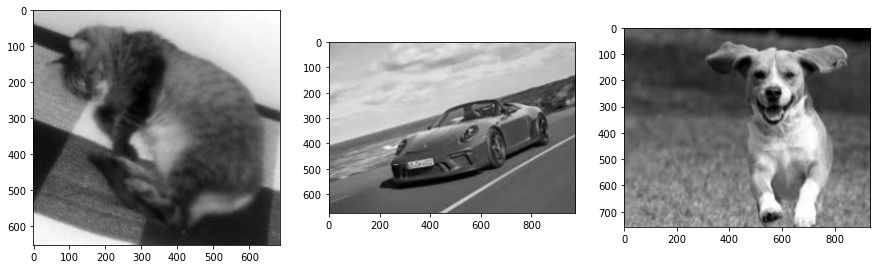

In [80]:
bigger_cat = reshapeImage(cat,4)
bigger_car = reshapeImage(car,4)
bigger_dog = reshapeImage(dog,4)

f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(bigger_cat,cmap='gray')
axarr[1].imshow(bigger_car,cmap='gray')
axarr[2].imshow(bigger_dog,cmap='gray')

print('Tamanho aumentado cat:({},{})'.format(bigger_cat.shape[0],bigger_cat.shape[1]))
print('Tamanho aumentado car:({},{})'.format(bigger_car.shape[0],bigger_car.shape[1]))
print('Tamanho aumentado dog:({},{})'.format(bigger_dog.shape[0],bigger_dog.shape[1]))

Tamanho diminuído cat:(40,42)
Tamanho diminuído car:(42,60)
Tamanho diminuído dog:(47,58)


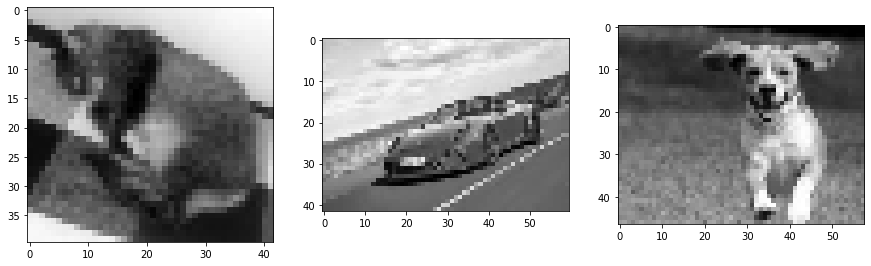

In [81]:
smaller_cat = reshapeImage(cat,1/4)
smaller_car = reshapeImage(car,1/4)
smaller_dog = reshapeImage(dog,1/4)

f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(smaller_cat,cmap='gray')
axarr[1].imshow(smaller_car,cmap='gray')
axarr[2].imshow(smaller_dog,cmap='gray')

print('Tamanho diminuído cat:({},{})'.format(smaller_cat.shape[0],smaller_cat.shape[1]))
print('Tamanho diminuído car:({},{})'.format(smaller_car.shape[0],smaller_car.shape[1]))
print('Tamanho diminuído dog:({},{})'.format(smaller_dog.shape[0],smaller_dog.shape[1]))

# Questão 11

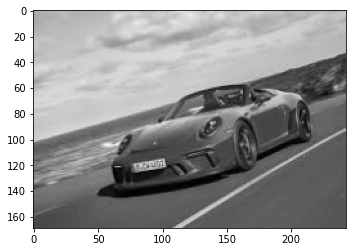

In [82]:
plt.imshow(car,cmap='gray')

In [83]:
# gerando as versões reduzidas

car2 = reshapeImage(car,1/2)
car3 = reshapeImage(car2,1/2)
car4 = reshapeImage(car3,1/2)

In [84]:
# gerando a pirâmide gaussiana

g_car2 = cv2.GaussianBlur(car,(3,3),3)
g_car2 = reshapeImage(g_car2,1/2)

g_car3 = cv2.GaussianBlur(g_car2,(3,3),3)
g_car3 = reshapeImage(g_car3,1/2)

g_car4 = cv2.GaussianBlur(g_car3,(3,3),3)
g_car4 = reshapeImage(g_car4,1/2)

In [85]:
plt.imsave('./car1.png',car,cmap='gray')
plt.imsave('./car2.png',car2,cmap='gray')
plt.imsave('./car3.png',car3,cmap='gray')
plt.imsave('./car4.png',car4,cmap='gray')
plt.imsave('./g_car2.png',g_car2,cmap='gray')
plt.imsave('./g_car3.png',g_car3,cmap='gray')
plt.imsave('./g_car4.png',g_car4,cmap='gray')

In [86]:
from PIL import Image

In [92]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [93]:
def get_concat_h_blank(im1, im2, color=(0, 0, 0)):
    dst = Image.new('RGB', (im1.width + im2.width, max(im1.height, im2.height)), color)
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [94]:
def get_concat_h_multi_blank(im_list):
    _im = im_list.pop(0)
    for im in im_list:
        _im = get_concat_h_blank(_im, im)
    return _im

In [95]:
car1 = Image.open('./car1.png')
car2 = Image.open('./car2.png')
car3 = Image.open('./car3.png')
car4 = Image.open('./car4.png')
g_car2 = Image.open('./g_car2.png')
g_car3 = Image.open('./g_car3.png')
g_car4 = Image.open('./g_car4.png')

### Resultado sem pirâmide gaussiana

In [96]:
concat = get_concat_h_multi_blank([car1,car2,car3,car4])

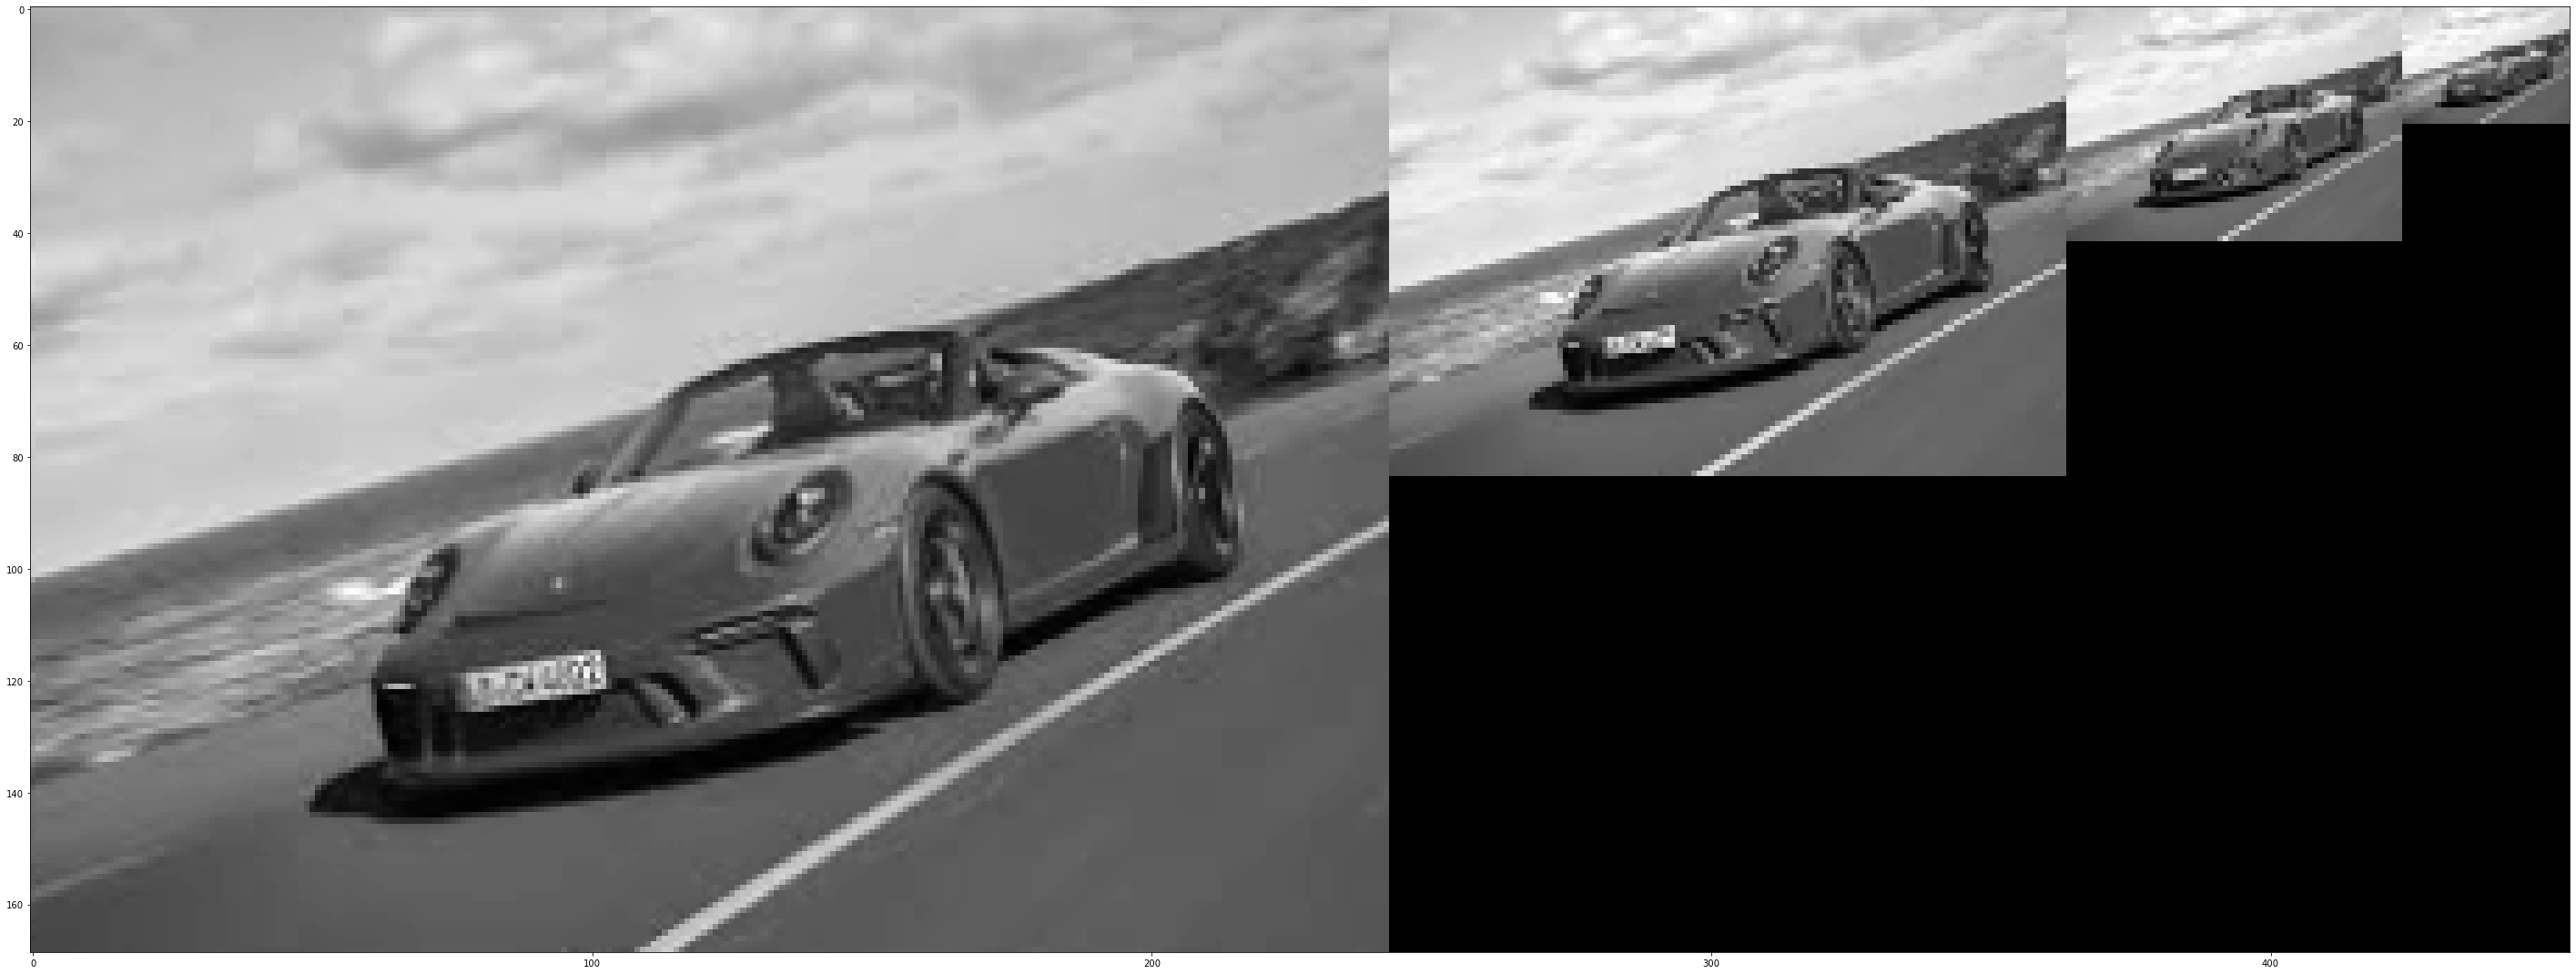

In [97]:
plt.figure(figsize=(50,50))
plt.imshow(concat,cmap='gray')

### Resultado com pirâmide gaussiana

In [98]:
concat2 = get_concat_h_multi_blank([car1,g_car2,g_car3,g_car4])

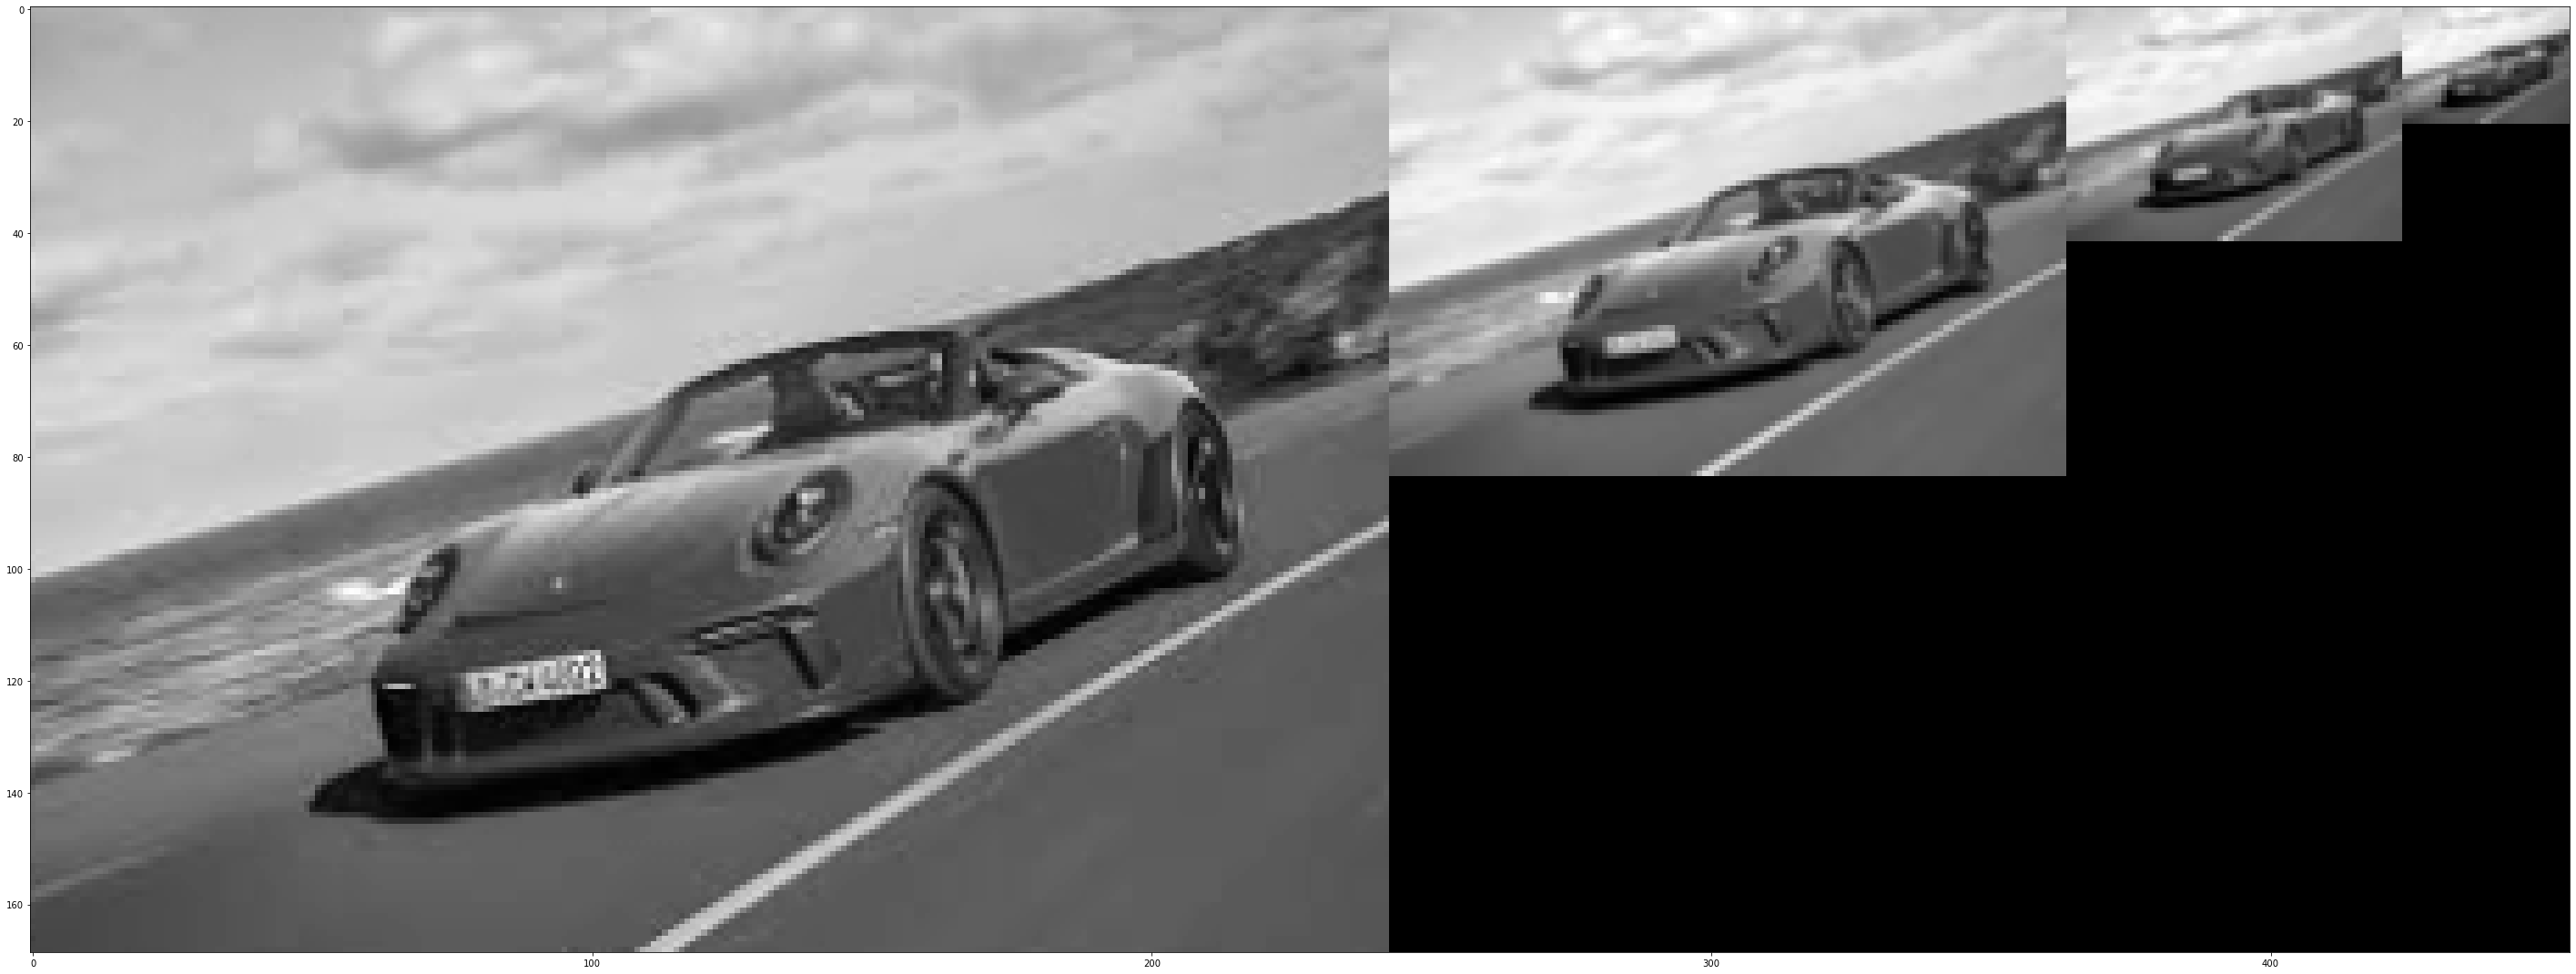

In [99]:
plt.figure(figsize=(50,50))
plt.imshow(concat2,cmap='gray')

# Questão 12

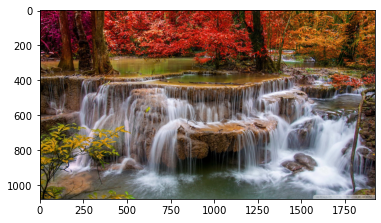

In [100]:
landscape = cv2.imread('./landscape.jpg')
landscape_rgb = cv2.cvtColor(landscape,cv2.COLOR_BGR2RGB)
plt.imshow(landscape_rgb)

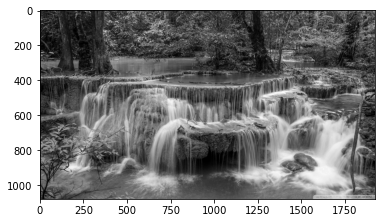

In [101]:
landscape = cv2.cvtColor(landscape,cv2.COLOR_BGR2GRAY)
plt.imshow(landscape,cmap='gray')

In [102]:
def edgeDetect(image,dx,dy):
    gx = aplicarFiltro(image,dx)
    gy = aplicarFiltro(image,dy)
    
    result = np.zeros(gx.shape[0]*gx.shape[1]).reshape((gx.shape[0],gx.shape[1]))
    
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i,j] = math.sqrt((gx[i,j]**2)+(gy[i,j]**2))
            
    return result

In [103]:
dx = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

In [104]:
dy = np.array([
    [-1,-1,-1],
    [ 0, 0, 0],
    [ 1, 1, 1]
])

In [105]:
no_sobel_edges = edgeDetect(landscape,dx,dy)

In [106]:
sobel_dx = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

In [107]:
sobel_dy = np.array([
    [-1,-2,-1],
    [ 0, 0, 0],
    [ 1, 2, 1]
])

In [108]:
sobel_edges = edgeDetect(landscape,sobel_dx,sobel_dy)

### Plotando os resultados, sem operador de Sobel e com operador de Sobel, respectivamente.
É possível ver que na imagem escolhida o uso do operador de Sobel não causou grande diferença no resultado quando comparado ao uso do gradiente.

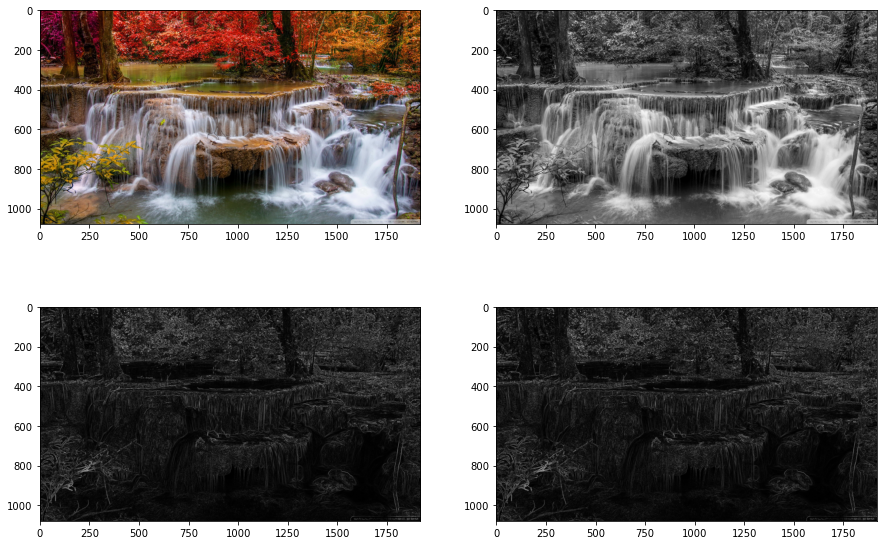

In [109]:
f, axarr = plt.subplots(2,2,figsize=(15,10))
axarr[0,0].imshow(landscape_rgb)
axarr[0,1].imshow(landscape,cmap='gray')
axarr[1,0].imshow(no_sobel_edges,cmap='gray')
axarr[1,1].imshow(sobel_edges,cmap='gray')